In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit
import joblib


Statistics & EDA steps done after of half preprocessing step like Handling Missing value and Outlier Treatment , before of encoding and feature scaling

In [2]:
df=pd.read_csv('telco-customer.csv')

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
from scipy.stats import ttest_ind

group1 = df[df['Churn'] == 'Yes']['MonthlyCharges'].dropna()
group2 = df[df['Churn'] == 'No']['MonthlyCharges'].dropna()

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"T-test: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")

T-test: t-statistic=18.408, p-value=0.000


In [8]:
print("Churn=Yes sample size:", len(group1))
print("Churn=No sample size:", len(group2))

Churn=Yes sample size: 1869
Churn=No sample size: 5174


#################################################################################################

Both are much greater than 30, so you have large samples.
However, since you do NOT know the population standard deviation, the correct test is still the t-test

Use the t-test for comparing means of MonthlyCharges between Churn groups.

The z-test is not appropriate because the population standard deviation is unknown

Visualize the Results

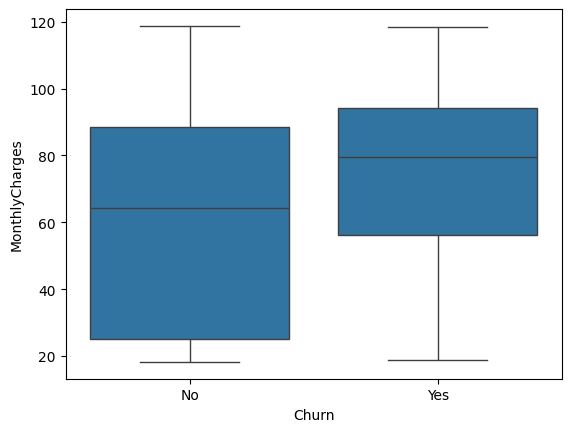

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

Yes, if a feature's p-value is less than 0.005, it is highly significant in most statistical contexts.

It’s commonly used in regression models (like Linear or Logistic Regression) or hypothesis testing.

The smaller the p-value, the more evidence you have to //""" reject the null hypothesis """// (which usually means "this feature has no effect").

✅ Yes, if p < 0.005, the feature is statistically important (strong evidence).

💡 But always combine p-values with domain knowledge and other methods (correlation, feature importance, etc.).

#######################################################################################################

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
# For TotalCharges
group1 = df[df['Churn'] == 'Yes']['TotalCharges'].dropna()
group2 = df[df['Churn'] == 'No']['TotalCharges'].dropna()
print("Churn=Yes sample size (TotalCharges):", len(group1))
print("Churn=No sample size (TotalCharges):", len(group2))
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"T-test for TotalCharges: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")

# For tenure
group1 = df[df['Churn'] == 'Yes']['tenure'].dropna()
group2 = df[df['Churn'] == 'No']['tenure'].dropna()
print("Churn=Yes sample size (tenure):", len(group1))
print("Churn=No sample size (tenure):", len(group2))
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"T-test for tenure: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")

Churn=Yes sample size (TotalCharges): 1869
Churn=No sample size (TotalCharges): 5163
T-test for TotalCharges: t-statistic=-18.801, p-value=0.000
Churn=Yes sample size (tenure): 1869
Churn=No sample size (tenure): 5174
T-test for tenure: t-statistic=-34.824, p-value=0.000


#####################################################################################

TotalCharges:

t-statistic = -18.801, p-value = 0.000
""Both groups have large sample sizes.""

###############################################################################

tenure:

t-statistic = -34.824, p-value = 0.000
""Both groups have large sample sizes.""

#####################################################################################################

Both p-values are much less than 0.05, so the differences in means for "TotalCharges" and "tenure" between Churn groups are statistically significant.

This means both features are important for distinguishing between customers who churn and those who do not.

#################################################################################################

Summarize Findings:

MonthlyCharges, TotalCharges, and tenure are all significantly different between churned and non-churned customers.

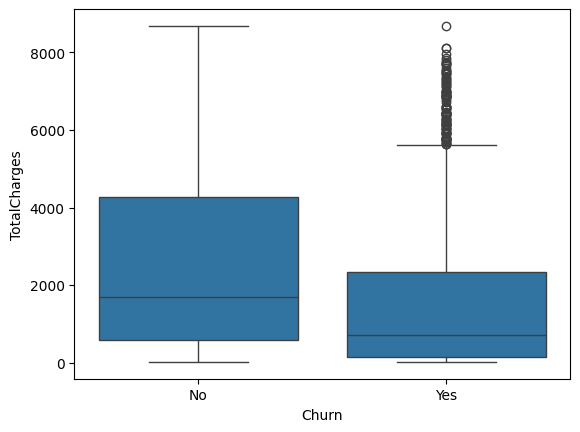

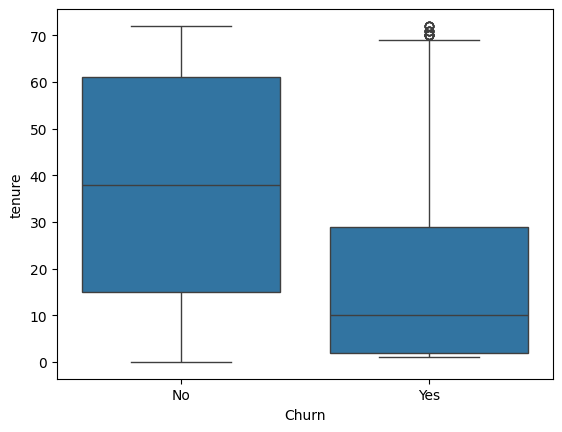

In [15]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.show()
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

In [16]:
#############################################################################################

""""""Mutual information"""""" is mainly used for -----feature selection---- in machine learning. It measures how much knowing one variable reduces uncertainty about another, capturing any kind of dependency (not just mean differences).


""""""z-test and t-test""""" are used for ----statistical analysis---- to compare means between groups and to test hypotheses -----(e.g., whether to reject the null hypothesis that two group means are equal)----.

################################################################################################

""""""Z-test is used for large samples""""""" ----- (n > 30) ------ and when the population standard deviation is known (which is rare in real-world scenarios).

""""""T-test is used for small or large samples""""""" ----- (any n) -------, when the population standard deviation is unknown (which is almost always the case in real-world data).

########################################################################################